In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
with open("quandl_api_key.txt") as file:
    api_key = file.read()[:-1]
    
quandl.ApiConfig.api_key = api_key

In [4]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [5]:
stock_dfs = (aapl, cisco, ibm, amzn)
stock_names = ['Apple', 'Cisco', 'IBM', 'Amazon']

In [6]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [7]:
for stock_df in stock_dfs:
    stock_df['Normalized Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [8]:
aapl.head()

,Adj. Close,Normalized Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [9]:
aapl.tail()

,Adj. Close,Normalized Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [10]:
# 30% in Apple
# 20% in Cisco
# 40% in Amazon
# 10% in IBM

In [11]:
for stock_df, allo_frac in zip(stock_dfs, [.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normalized Return'] * allo_frac

In [12]:
aapl.head()

,Adj. Close,Normalized Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [13]:
MONEY = 1e6

In [14]:
for stock_df in stock_dfs:
    stock_df['Position Values'] = round(stock_df['Allocation'] * MONEY, 2)

In [15]:
aapl.head()

,Adj. Close,Normalized Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.00
2012-01-04,53.132802,1.005374,0.301612,301612.24
2012-01-05,53.722681,1.016536,0.304961,304960.73
2012-01-06,54.284287,1.027162,0.308149,308148.72
2012-01-09,54.198183,1.025533,0.307660,307659.95


In [16]:
aapl.tail()

,Adj. Close,Normalized Return,Allocation,Position Values
Date,,,,
2016-12-23,115.080808,2.177549,0.653265,653264.62
2016-12-27,115.811668,2.191378,0.657413,657413.40
2016-12-28,115.317843,2.182034,0.654610,654610.17
2016-12-29,115.288214,2.181473,0.654442,654441.97
2016-12-30,114.389454,2.164467,0.649340,649340.10


In [17]:
all_pos_vals = [stock_df['Position Values'] for stock_df in stock_dfs]

portfolio_val = pd.concat(all_pos_vals, axis=1)
portfolio_val.columns = [name + ' Position' for name in stock_names]

In [18]:
portfolio_val.head()

,Apple Position,Cisco Position,IBM Position,Amazon Position
Date,,,,
2012-01-03,300000.00,200000.00,400000.00,100000.00
2012-01-04,301612.24,203864.73,398368.22,99150.98
2012-01-05,304960.73,203113.26,396478.80,99206.84
2012-01-06,308148.72,202361.78,391927.00,101999.66
2012-01-09,307659.95,203650.03,389887.28,99737.47


In [19]:
portfolio_val['Total Position'] = portfolio_val.sum(axis=1)

In [20]:
portfolio_val

,Apple Position,Cisco Position,IBM Position,Amazon Position,Total Position
Date,,,,,
2012-01-03,300000.00,200000.00,400000.00,100000.00,1000000.00
2012-01-04,301612.24,203864.73,398368.22,99150.98,1002996.17
2012-01-05,304960.73,203113.26,396478.80,99206.84,1003759.63
2012-01-06,308148.72,202361.78,391927.00,101999.66,1004437.16
2012-01-09,307659.95,203650.03,389887.28,99737.47,1000934.73
...,...,...,...,...,...
2016-12-23,653264.62,377469.02,407359.96,424839.41,1862933.01
2016-12-27,657413.40,379323.60,408410.67,430877.51,1876025.18
2016-12-28,654610.17,376108.99,406089.32,431285.26,1868093.74


Text(0.5, 1.0, 'Total Portfolio Value')

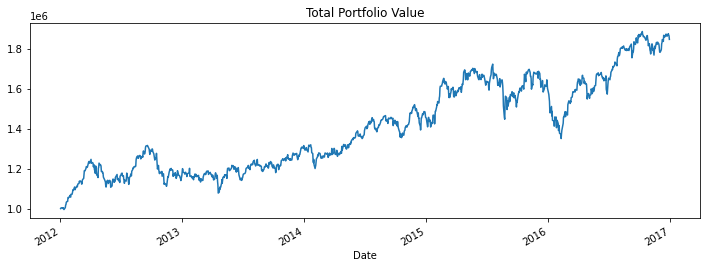

In [21]:
import matplotlib.pyplot as plt

portfolio_val['Total Position'].plot(figsize=(12, 4))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

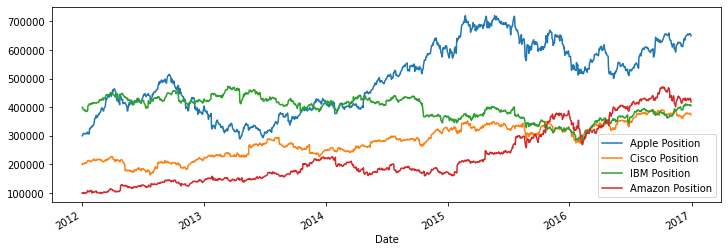

In [22]:
portfolio_val.drop('Total Position', axis=1).plot(figsize=(12, 4))

In [23]:
portfolio_val['Daily Returns'] = portfolio_val['Total Position'].pct_change(1)

In [24]:
portfolio_val.head()

,Apple Position,Cisco Position,IBM Position,Amazon Position,Total Position,Daily Returns
Date,,,,,,
2012-01-03,300000.00,200000.00,400000.00,100000.00,1000000.00,NaN
2012-01-04,301612.24,203864.73,398368.22,99150.98,1002996.17,0.002996
2012-01-05,304960.73,203113.26,396478.80,99206.84,1003759.63,0.000761
2012-01-06,308148.72,202361.78,391927.00,101999.66,1004437.16,0.000675
2012-01-09,307659.95,203650.03,389887.28,99737.47,1000934.73,-0.003487


In [25]:
portfolio_val['Daily Returns'].mean()

0.0005442330760441665

In [26]:
portfolio_val['Daily Returns'].std()

0.010568287703643982

<AxesSubplot:ylabel='Frequency'>

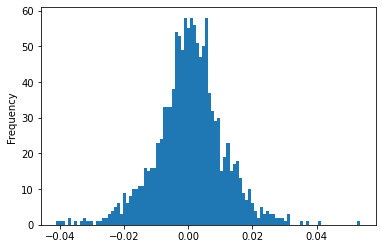

In [27]:
portfolio_val['Daily Returns'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Density'>

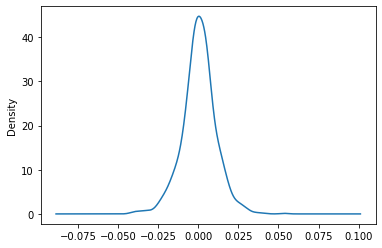

In [28]:
portfolio_val['Daily Returns'].plot(kind='kde')

In [29]:
cumulative_return = 100 * (portfolio_val['Total Position'][-1]/portfolio_val['Total Position'][0] - 1)

In [30]:
# Cumulative Return Percentage

cumulative_return

84.742853

In [31]:
# Sharpe Ratio 
## Assume: R_f = 0 (Risk Free Rate)

SR = portfolio_val['Daily Returns'].mean() / portfolio_val['Daily Returns'].std()

In [32]:
SR

0.05149680736421597

In [33]:
import math

ASR = math.sqrt(252) * SR

In [34]:
ASR

0.8174864735970904